In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import sqrtm

# Covpts
Generates a set of points for a covariance matrix,
mean x, variance P, and with 'n' points to it.
The default value of n is 250.

In [2]:
def covpts(xm, P, n=250):
    if n is None:
        n = 250

    Psqrt = np.real(sqrtm(P[:2, :2]))
    xm = xm[:2]
    angle = 2 * np.pi / n

    x = np.zeros(n + 1)
    y = np.zeros(n + 1)

    for c in range(n + 1):
        xy = Psqrt @ np.array([np.cos(c * angle), np.sin(c * angle)])
        x[c] = xy[0] + xm[0]
        y[c] = xy[1] + xm[1]

    return x, y

covpts([100, 200], np.array([[10, 20], [30, 40]]))

(array([101.75091696, 101.81449183, 101.87692063, 101.93816392,
        101.99818303, 102.05694004, 102.11439785, 102.17052016,
        102.22527152, 102.27861735, 102.33052396, 102.38095856,
        102.42988929, 102.47728526, 102.52311651, 102.56735412,
        102.60997012, 102.65093762, 102.69023072, 102.72782462,
        102.76369557, 102.7978209 , 102.83017908, 102.86074965,
        102.88951331, 102.91645189, 102.94154838, 102.96478692,
        102.98615284, 103.00563264, 103.02321402, 103.03888587,
        103.0526383 , 103.06446262, 103.07435135, 103.08229826,
        103.08829833, 103.09234775, 103.09444399, 103.09458571,
        103.09277282, 103.08900647, 103.08328903, 103.07562413,
        103.0660166 , 103.0544725 , 103.04099913, 103.02560501,
        103.00829984, 102.98909457, 102.96800132, 102.94503342,
        102.92020538, 102.89353287, 102.86503274, 102.834723  ,
        102.80262278, 102.76875237, 102.73313315, 102.69578763,
        102.65673939, 102.6160131 , 102.

Plot 2x2 covariance ellipse
===========================
Indicate pose uncertainty $S$ of pose $E$ by drawing the error ellipse at $E$

Input arguments:
- `E` is the expected value of the pose with `x` and `y` coordinates
- `S` is a 2x2 covariance matrix with the following structure:

```
xx xy
xy yy
```


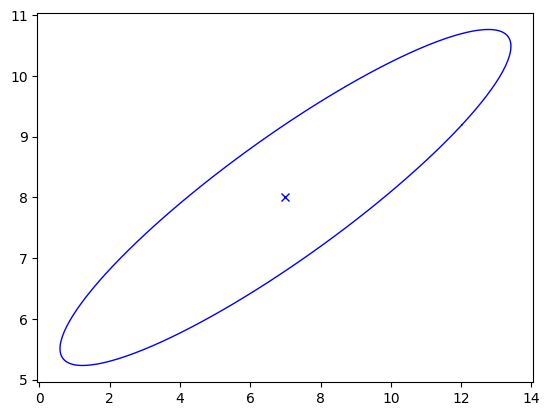

In [3]:
def covellipse(E, S, color='blue', linewidth=1):
    E = E[0:2]
    xs, ys = covpts(E, S)
    plt.plot(xs, ys, color=color, linewidth=linewidth)
    plt.plot(E[0], E[1], 'x', color=color, linewidth=linewidth)

covellipse(E = np.array([7, 8]), S = np.array([[30, 30], [9, 11]]))